In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/Shareddrives/Projeto Python/Teste.txt', 'r') as txt:
  txt = txt.readlines()

In [ ]:
datas = []
horas = []
minutos = []
contatos = []

# parsear todas as linhas
for linha in txt:

  if linha[0].isdigit() == True:        #Se o primeiro caractere da linha for um número (isso já exclui as linhas extras de msgs com mais de uma linha)
    linha = linha.split(' - ')     #divide a linha em antes e depois do ' - '
    data_hora = linha[0]          #formato: dd/mm/aaaa hh:mm
    mensagem = linha[1:]          #formato: número do contato: mensagem ou mensagens do sistema

    # parsear data e hora
    data_hora = data_hora.split(' ')      #separar a data da hora
    data = data_hora[0]
    horas_minuto = data_hora[-1]
  
    horas_minutos = horas_minuto.split(':')    #Separar hora de minutos
    hora= horas_minutos[0]
    minuto= horas_minutos[-1]

    datas.append(data)
    horas.append(hora)
    minutos.append(minuto)

    # parsear mensagem
    msg = ''
    for parte in mensagem:
      msg += parte.strip('\n') + ' '       #tirar o \n das mensagens
    msg = msg.split(': ')                 #separar o número e a mensagem
    contato = msg[0]                      #contato vai ser só o que tem antes do ': '
  
    contatos.append(contato)

#tenho agora 4 listas: datas, horas, minutos e contatos
#crio um dataframe com as listas

df = pd.DataFrame(list(zip(datas, horas, minutos, contatos)), 
               columns =['Data', 'Hora', 'Minutos', 'Contatos'])

df = df.loc[df['Contatos'] != ""]     #eliminando as linhas que não tem número na coluna 'Contatos'

# Eliminando as linhas de mensagens do sistema
df['Contatos'] = df['Contatos'].astype(str) # Transformando todos os dados da coluna em strings

df_remove = df[df['Contatos'].map(len) > 17] # Criando um dataframe com os dados que não queremos - mensagens do sistema
df.drop(df_remove.index, inplace=True) # Removendo do dataframe original os valores baseados nos indices da df_remove

df.reset_index(inplace=True)          #renumera as linhas do df

T_msg= df.shape
T_msg= T_msg[0]    #Calculando o total de msg do grupo

Cont_msg = df['Contatos'].value_counts() # Conta quantas mensagens cada contato enviou
dfCont_msg= pd.DataFrame(Cont_msg) # Crio um data frame com a contagem das mensagens
dfCont_msg= dfCont_msg.reset_index()  # Tira os contatos do indice
dfCont_msg= dfCont_msg.rename(columns={'index':'Contato','Contatos':'N° de mensagens'}) # Renomeia colunas

T_cont= dfCont_msg.shape
T_cont= T_cont[0]  #Calcula total de membros no grupo

Cont_hora = df['Hora'].value_counts() #Conta o horario mais ativo do grupo
dfCont_hora= pd.DataFrame(Cont_hora) # Crio um data frame com a contagem das mensagens
dfCont_hora= dfCont_hora.reset_index()   # Tira os horarios do indice
dfCont_hora= dfCont_hora.rename(columns={'index':'Hora', 'Hora':'N° de mensagens'}) # Renomeia colunas

In [ ]:
#Exibir análises não gráficas
print(f'Esse grupo ja teve {T_cont} membros e ja foram enviadas nele {T_msg} mensagens')

Esse grupo ja teve 7 membros e ja foram enviadas nele 693 mensagens


In [ ]:
dfCont_msg

,Contato,N° de mensagens
0,+55 11 97656-4662,218
1,+55 19 99816-3392,184
2,+55 11 94980-1499,177
3,+55 11 95461-8728,72
4,+55 14 99684-0418,32
5,+55 11 99202-1664,7
6,+55 19 98102-3366,3


In [ ]:
dfCont_hora

,Hora,N° de mensagens
0,17,123
1,16,96
2,14,90
3,00,84
4,22,68
5,19,44
6,13,44
7,15,37
8,18,35
9,20,28


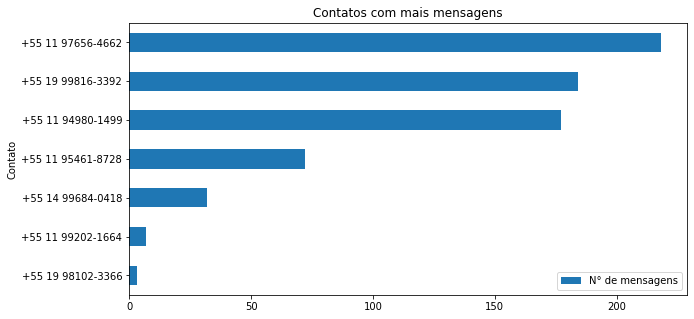

In [ ]:
#Agora vamos plotar os gráficos
#Podemos usar os dataframes para plotar os respectivos gráficos

dfCont_msg.plot(kind='barh',
                x='Contato', y='N° de mensagens',
                title='Contatos com mais mensagens',
                ylabel='N° de mensagens',
                figsize=(10,5))   #definimos todas as características do gráfico, os eixos, título, rótulos que faltavam e tamanho da figura

plt.gca().invert_yaxis()
plt.show() #mostrar o gráfico

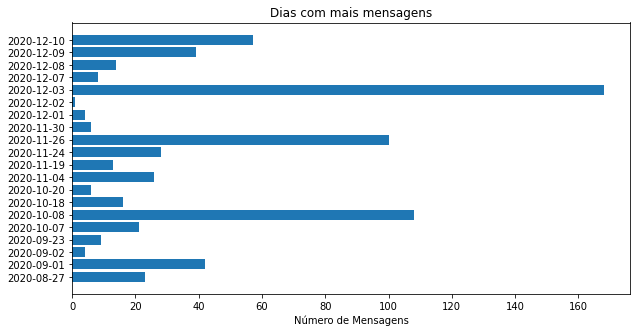

In [ ]:
df["Data"]= pd.to_datetime(df["Data"],format="%d/%m/%Y") #Mudar o formato da data de string para date time assim trabalhamos com a ordem dos dias, no formato dia mes ano
df.sort_values("Data",inplace=True) # Ordenar os valores
df.groupby("Data").count() #Agrupa todos os valores com a mesma data pelo groupby e o .count conta quantos valores de cada coluna tem a mesma data

x= list(range(len(df.groupby("Data").count().index))) #Lista de sequencia de escalares que acompanham o tamanho do dataframe
altura= list(df.groupby("Data").count()["Hora"]) #Frequencia de cada data
plt.figure(figsize=(10, 5))
plt.barh(x,altura) #plotamos as barras horizontais
plt.yticks(x,df.groupby("Data").count().index.astype("str").str[:10]) #ajustar os ticks 
plt.title("Dias com mais mensagens") #titulo
plt.xlabel("Número de Mensagens") #subtitulo
plt.show() #mostrar o gráfico

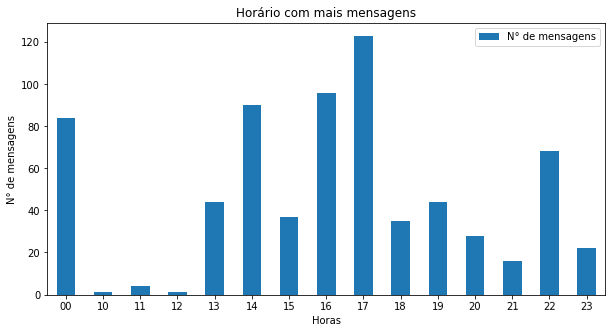

In [ ]:
df_hora = dfCont_hora.set_index('Hora')  #definimos a coluna 'Hora' como índice e atribuimos isso a um novo dataframe
df_hora.sort_index(inplace=True)   #ordenamos o índice desse novo dataframe para ficar na ordem das horas do dia
df_hora.plot(kind='bar', 
                 y='N° de mensagens', 
                 title='Horário com mais mensagens',
                 xlabel='Horas',
                 ylabel='N° de mensagens',
                 rot=True,
                 figsize=(10,5))   #definimos todas as características do gráfico, os eixos, título, rótulos que faltavam e tamanho da figura

plt.show()